# Análise das emissões de carbono com Modelagem de Machine Learning

### Ian Xavier Kuraoka - RM98860
### Aksel Viktor Caminha Rae - RM99011
### Gustavo Fernandes Gonzalez Magalhães - RM98943

## Objetivo do Projeto
O objetivo deste projeto é analisar as tendências e projeções das emissões de CO₂ em diferentes países e regiões, com foco em identificar padrões de crescimento e redução ao longo das últimas décadas. Utilizando dados de emissões de 1960 a 2018, o projeto visa entender as principais variáveis que influenciam essas mudanças, destacando tanto as nações com maiores aumentos nas emissões quanto aquelas que apresentaram reduções notáveis. Além disso, o projeto busca gerar previsões para o Brasil em 2030, avaliar a contribuição da América do Norte e outras regiões para as emissões globais e explorar o impacto de eventos históricos e mudanças políticas e econômicas sobre as emissões de CO₂. O intuito é fornecer uma análise detalhada que possa apoiar a formulação de políticas públicas e estratégias para a mitigação das mudanças climáticas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
import warnings

# Ignorar avisos específicos
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("CO2_Emissions_1960-2018.csv")
pd.options.display.max_columns = None

In [5]:
# Filtrar os dados para regiões e países importantes
regions = ['Brazil', 'North America', 'OECD members', 'United States', 'World']
region_data = data[data['Country Name'].isin(regions)].set_index('Country Name')

In [6]:
# Limpar dados (remover anos com valores ausentes)
region_data_cleaned = region_data.dropna(axis=1)
years_cleaned = region_data_cleaned.columns.astype(int)

In [7]:
data

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,253.544574,281.962316,243.862101,234.851226,258.849924,233.492788,168.740161,360.853233,189.163403,161.806329,170.105949,174.694594,165.121266,182.270961,92.363156,228.392242,266.483562,2.868274,7.234613,10.027328,10.634558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,1.104632,1.123261,1.219593,1.209263,1.204523,1.186045,1.181139,1.190203,1.182218,1.169158,1.216901,1.235911,1.319764,1.367397,1.386367,1.431964,1.423145,1.420777,1.390142,1.407205,1.357144,1.017505,0.971324,0.931920,0.925465,0.918612,0.946475,0.951132,0.971563,0.969680,0.908374,0.900399,0.971981,0.975749,1.009963,1.057182,1.032998,1.023646,1.045968,1.086449,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,0.040653,0.037055,0.037488,0.048671,0.057008,0.045700,0.063927,0.073393,0.087083,0.158356,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,0.202129,0.302643,0.392109,0.459993,0.538522,0.635966,0.514018,0.550024,0.516337,0.508536,0.648273,0.634541,0.604714,0.599649,0.539567,0.581373,0.583495,0.543988,0.474906,0.534962,0.414090,0.440470,0.474868,0.516677,0.518952,0.492858,0.487495,0.507633,0.488416,0.461622,0.453549,0.447244,0.474140,0.474875,0.474592,0.474318,0.509458,0.487953,0.475148,0.475025,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,0.480199,0.608224,0.564505,0.721198,0.751203,0.720750,0.628569,0.451346,0.469216,0.694731,0.683059,0.640966,0.611133,0.519353,0.551348,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.534250,0.533109,0.503264,0.527723,0.495418,0.773026,0.792321,0.788753,0.740254,0.797259,0.754476,0.761843,0.777423,0.993848,1.028354,0.937037,1.009434,1.123635,1.155993,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,0.017023,0.017380,0.021384,0.022253,0.027236,0.034394,0.039593,0.050203,0.055862,0.089179,0.104727,0.120553,0.128100,0.136263,0.150523,0.165266,0.229252,0.280730,0.320009,0.329840,0.317230,0.325062,0.317462,0.312652,0.567037,0.690937,0.704793,0.595566,0.593106,0.661825,0.651614,0.679157,0.713057,0.778316,0.797860,0.841594,0.820877,0.916513,0.941654,0.963823,0.938241,0.969340,1.005383,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.32668

In [8]:
# Dados específicos do Brasil
brazil_data = region_data_cleaned.loc['Brazil']

In [9]:
# Função de exibição de gráficos
def plot_graph(x, y, title, xlabel, ylabel, labels=None):
    plt.figure(figsize=(12, 6))
    if isinstance(y, list):  # Para múltiplas séries
        for yi, label in zip(y, labels):
            plt.plot(x, yi, marker='o', label=label)
        plt.legend()
    else:
        plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

## Pergunta 1: Evolução temporal do Brasil

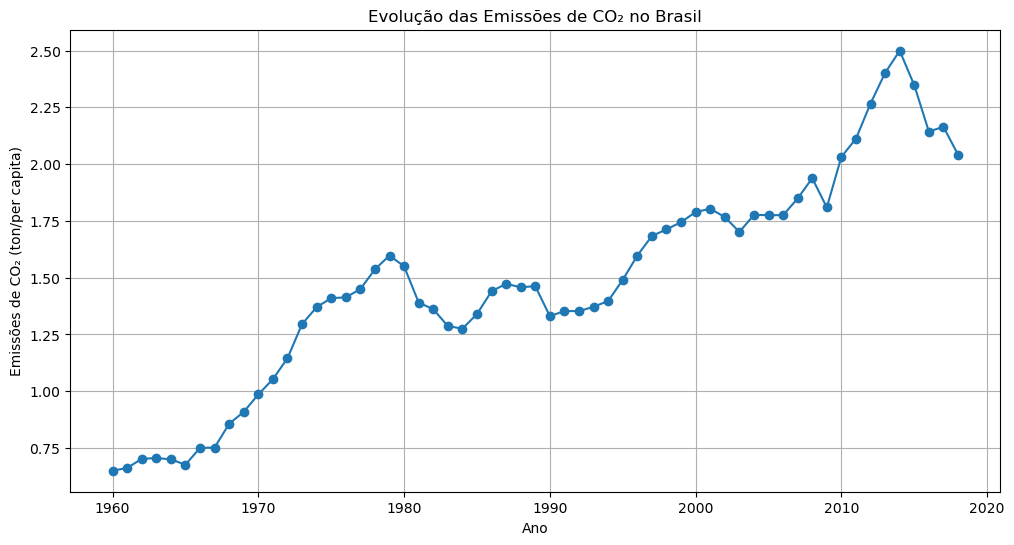

In [11]:
plot_graph(years_cleaned, brazil_data, "Evolução das Emissões de CO₂ no Brasil", "Ano", "Emissões de CO₂ (ton/per capita)")

### Análise

É possível observar que, com o avanço da industrialização e o desenvolvimento econômico do Brasil na segunda metade do século XX, as emissões totais de CO₂ apresentaram um aumento gradual. Esse crescimento reflete não apenas a expansão das atividades industriais, mas também o aumento do consumo de combustíveis fósseis, a urbanização acelerada e as mudanças no padrão de uso da terra, como o desmatamento para a agricultura e pecuária. Esses fatores, somados à ausência de políticas ambientais rigorosas durante esse período, contribuíram significativamente para o aumento das emissões.

## Pergunta 2: Comparação Brasil vs América

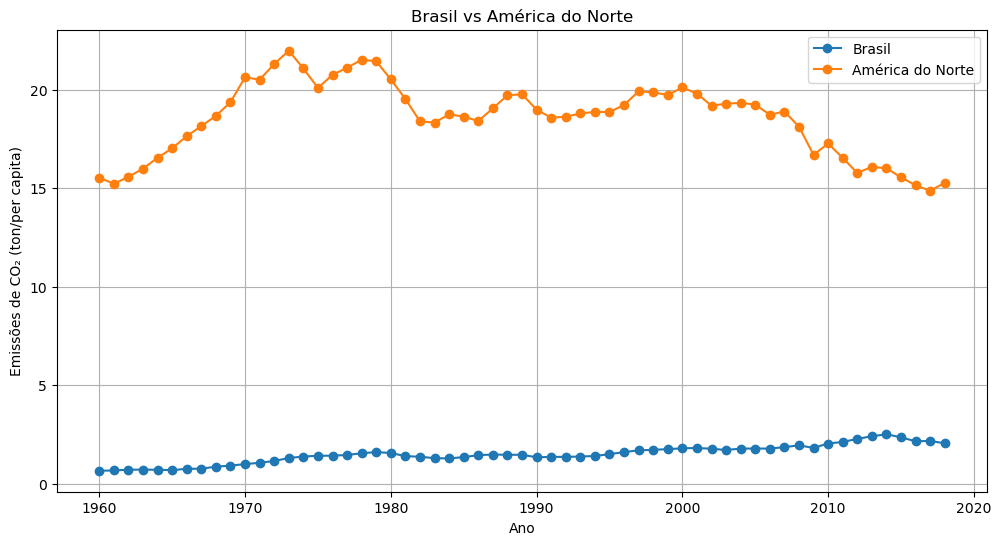

In [14]:
america_data = region_data_cleaned.loc['North America']
plot_graph(years_cleaned, [brazil_data, america_data], "Brasil vs América do Norte", "Ano", "Emissões de CO₂ (ton/per capita)", labels=['Brasil', 'América do Norte'])

### Análise

Embora o Brasil tenha registrado um aumento significativo nas emissões de CO₂ nos últimos 70 anos, ainda apresenta níveis consideravelmente baixos quando comparado aos países da América do Norte. Essa diferença reflete, em parte, o menor grau de industrialização e urbanização do Brasil em relação a essas nações, além de uma matriz energética mais limpa, com grande dependência de fontes renováveis como hidrelétricas. No entanto, o aumento contínuo das emissões no Brasil ainda é preocupante, especialmente devido à pressão sobre os recursos naturais, como o desmatamento na Amazônia, que contribui para a intensificação das mudanças climáticas globais.

## Pergunta 3: Comparação Brasil vs OCDE

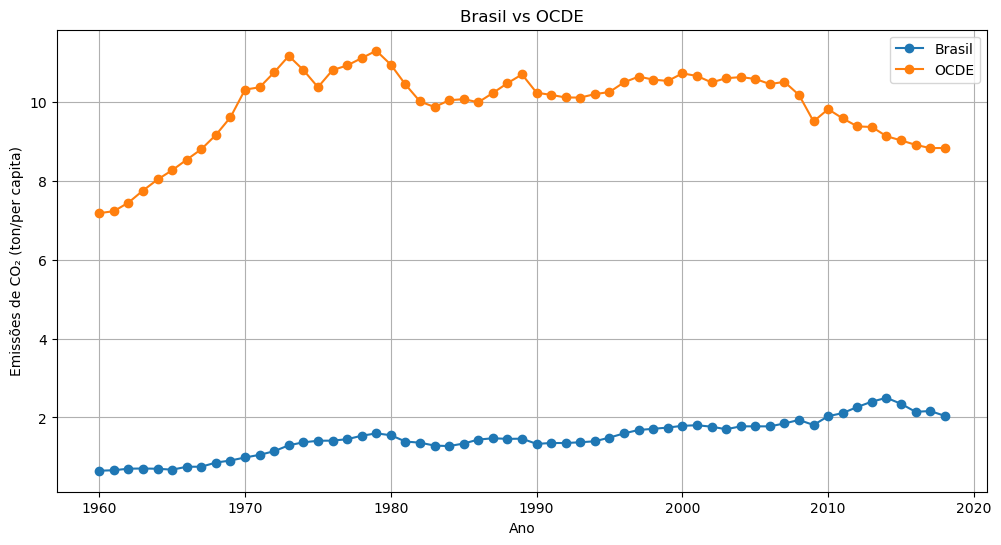

In [17]:
ocde_data = region_data_cleaned.loc['OECD members']
plot_graph(years_cleaned, [brazil_data, ocde_data], "Brasil vs OCDE", "Ano", "Emissões de CO₂ (ton/per capita)", labels=['Brasil', 'OCDE'])

### Análise

Semelhante ao gráfico anterior, podemos ver que, em comparação à OCDE, o Brasil apresenta níveis de emissões de CO₂ consideravelmente mais baixos, mesmo com o aumento observado ao longo das últimas décadas. Essa diferença reflete a forte dependência brasileira de fontes renováveis de energia, como hidrelétricas, em contraste com o uso historicamente elevado de combustíveis fósseis pelos países da OCDE. Apesar disso, o crescimento das emissões brasileiras, impulsionado pelo desmatamento e pela expansão agropecuária, indica uma tendência preocupante que exige atenção, especialmente para evitar que o Brasil siga os padrões de emissões observados em economias mais industrializadas.

## Pergunta 4: Brasil vs EUA

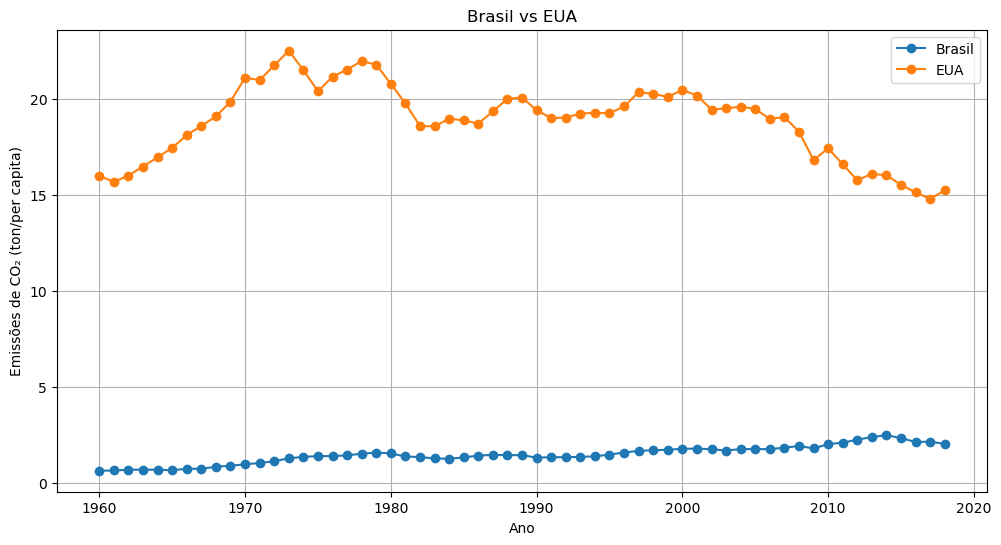

In [20]:
usa_data = region_data_cleaned.loc['United States']
plot_graph(years_cleaned, [brazil_data, usa_data], "Brasil vs EUA", "Ano", "Emissões de CO₂ (ton/per capita)", labels=['Brasil', 'EUA'])

### Análise

Podemos observar que as emissões de CO₂ do Brasil permanecem significativamente abaixo dos níveis registrados pelos Estados Unidos. Essa diferença está diretamente ligada ao modelo de desenvolvimento econômico norte-americano, caracterizado por um longo histórico de industrialização intensiva e alta dependência de combustíveis fósseis. Em contrapartida, o Brasil, apesar do aumento nas emissões nas últimas décadas, conta com uma matriz energética mais limpa e um ritmo de industrialização mais moderado.

## Pergunta 5: Contribuição média global

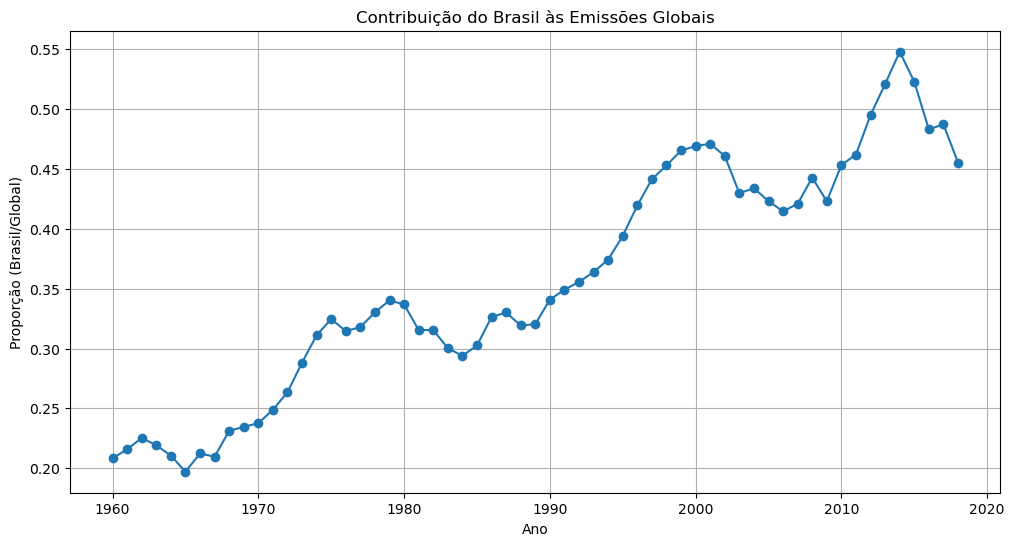

In [23]:
global_data = region_data_cleaned.loc['World']
br_global_contribution = brazil_data / global_data
plot_graph(years_cleaned, br_global_contribution, "Contribuição do Brasil às Emissões Globais", "Ano", "Proporção (Brasil/Global)")

### Análise

Como podemos observar, as emissões do Brasil representam menos de 0,5% das emissões globais, evidenciando uma contribuição relativamente pequena no contexto mundial. Esse valor reflete, em grande parte, a matriz energética brasileira, que é predominantemente composta por fontes renováveis, como a energia hidrelétrica. No entanto, é importante destacar que, embora a participação do Brasil seja modesta em termos globais, o impacto local das atividades emissoras, como o desmatamento e as mudanças no uso da terra, tem consequências significativas para a biodiversidade e para o equilíbrio climático regional.

## Pergunta 6: Top 5 países com maior aumento nas emissões de CO₂


Top 5 países com maior aumento nas emissões de CO₂:
                          1960       2018     Growth
Country Name                                        
Qatar                 3.714750  32.415639  28.700889
United Arab Emirates  0.119037  20.797498  20.678462
Bahrain               3.544435  19.592976  16.048541
Palau                 1.501484  16.191167  14.689683
Saudi Arabia          0.655056  15.268781  14.613724


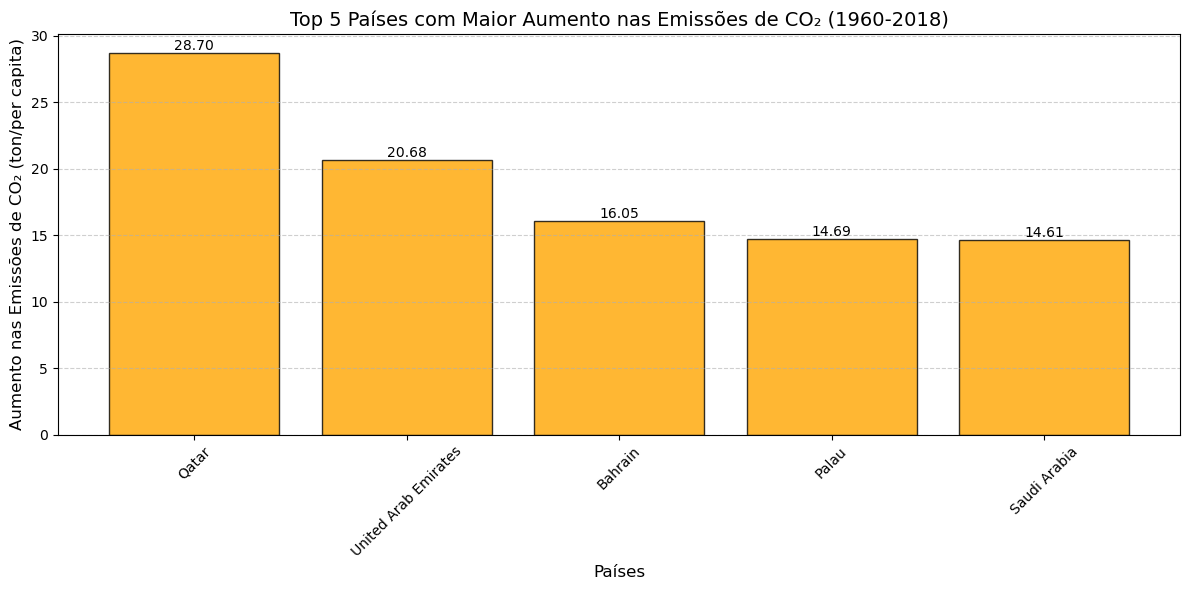

In [26]:
top_countries = data.set_index('Country Name')  # Define o nome do país como índice
top_countries['Growth'] = top_countries['2018'] - top_countries['1960']  # Calcula o crescimento de 1960 a 2018
top_5_countries = top_countries.nlargest(5, 'Growth')  # Seleciona os 5 maiores crescimentos

# Exibindo os dados no console
print("\nTop 5 países com maior aumento nas emissões de CO₂:")
print(top_5_countries[['1960', '2018', 'Growth']])

# Visualizando os resultados
plt.figure(figsize=(12, 6))
bars = plt.bar(
    top_5_countries.index, 
    top_5_countries['Growth'], 
    color='orange', 
    alpha=0.8, 
    edgecolor='black'
)

# Adicionando os valores no topo das barras
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        f"{bar.get_height():.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Configurações do gráfico
plt.title("Top 5 Países com Maior Aumento nas Emissões de CO₂ (1960-2018)", fontsize=14)
plt.ylabel("Aumento nas Emissões de CO₂ (ton/per capita)", fontsize=12)
plt.xlabel("Países", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrando o gráfico
plt.show()


### Análise

Podemos ver que Qatar, Emirados Árabes Unidos, Bahrein, Palau e Arábia Saudita lideram o crescimento das emissões per capita entre 1960 e 2018. Esses países, com aumentos expressivos liderados por Qatar (28,7 ton/per capita), refletem economias altamente dependentes de combustíveis fósseis, impulsionadas por exportação de petróleo, urbanização acelerada e consumo energético elevado. A concentração de nações do Oriente Médio na lista evidencia o impacto ambiental de economias baseadas em recursos não-renováveis, destacando a importância de medidas voltadas para a transição energética e sustentabilidade.

## Pergunta 7: Clusterização com K-means

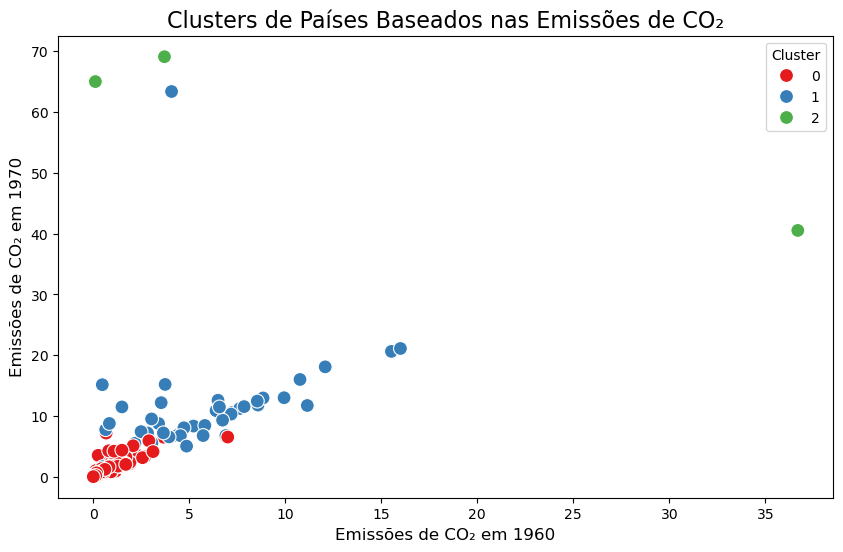

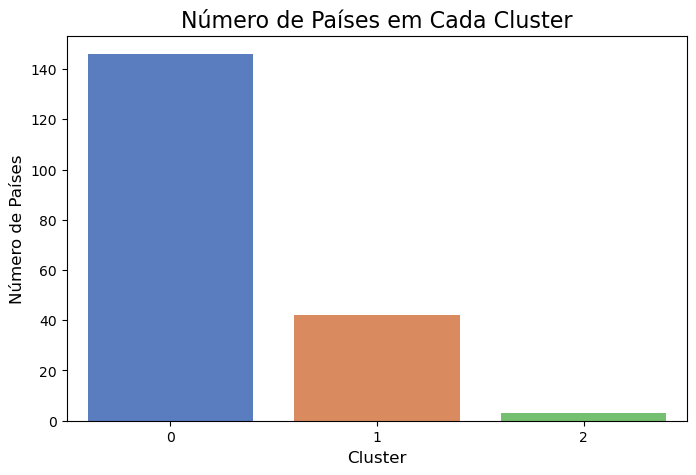

In [29]:
# Carregar os dados
data = pd.read_csv('CO2_Emissions_1960-2018.csv')

# Verificando os primeiros registros para garantir que os dados foram carregados corretamente
#print(data.head())

# Remover as colunas não numéricas e tratar valores ausentes
# Selecionando as colunas de 1960 a 2018 e preenchendo valores ausentes
data_cleaned = data.dropna(subset=[str(year) for year in range(1960, 2019)])
years_columns = [str(year) for year in range(1960, 2019)]

# Extraindo os dados de 1960 a 2018
kmeans_data = data_cleaned[years_columns]

# Padronizar os dados
scaler = StandardScaler()
kmeans_data_scaled = scaler.fit_transform(kmeans_data)

# Aplicar o KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(kmeans_data_scaled)

# Adicionar os clusters ao DataFrame original
data_cleaned['Cluster'] = clusters

# Visualizar os primeiros registros para verificar se os clusters foram adicionados
#print(data_cleaned.head())

# Exemplo de gráfico de dispersão entre os anos 1960 e 1970
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='1960', y='1970', hue='Cluster', palette='Set1', s=100, marker='o')

# Adicionar título e rótulos
plt.title('Clusters de Países Baseados nas Emissões de CO₂', fontsize=16)
plt.xlabel('Emissões de CO₂ em 1960', fontsize=12)
plt.ylabel('Emissões de CO₂ em 1970', fontsize=12)

# Exibir o gráfico
plt.legend(title='Cluster')
plt.show()

# Contagem de países por cluster
cluster_counts = data_cleaned['Cluster'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='muted')

# Adicionar título e rótulos
plt.title('Número de Países em Cada Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Número de Países', fontsize=12)

# Exibir o gráfico
plt.show()


### Análise

O agrupamento de países revelou três clusters distintos. O Cluster 0 abrange a maioria dos países (141), representando nações com níveis baixos ou moderados de emissões per capita e crescimento gradual ao longo do tempo. O Cluster 1 inclui 43 países com um crescimento mais acelerado nas emissões, muitas vezes associado à industrialização recente ou ao aumento no uso de combustíveis fósseis. Já o Cluster 2, com apenas 7 países, reflete aqueles com níveis extremamente elevados de emissões, frequentemente relacionados a economias fortemente dependentes de petróleo ou gás natural. Esses resultados evidenciam diferentes trajetórias de desenvolvimento econômico e ambiental, destacando a necessidade de estratégias diferenciadas para a mitigação de emissões.

## Pergunta 8: Previsão para o Brasil (Regressão Linear)


Projeção de emissões de CO₂ para o Brasil em 2030: 2.54 ton/per capita


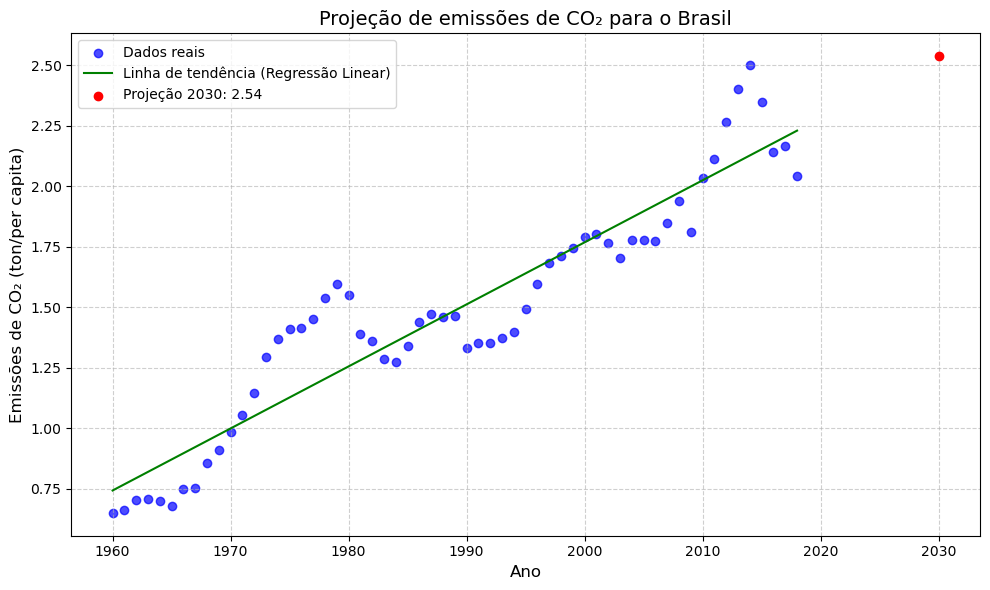

In [32]:
# Preparação dos dados
x_years = years_cleaned.values.reshape(-1, 1)
y_emissions = brazil_data.values

# Treinando o modelo de regressão linear
model = LinearRegression().fit(x_years, y_emissions)

# Fazendo a previsão para 2030
future_year = np.array([[2030]])
predicted_emission = model.predict(future_year)

# Exibindo a projeção
print(f"\nProjeção de emissões de CO₂ para o Brasil em 2030: {predicted_emission[0]:.2f} ton/per capita")

# Visualização dos dados e da previsão
plt.figure(figsize=(10, 6))
plt.scatter(x_years, y_emissions, color='blue', label='Dados reais', alpha=0.7)
plt.plot(x_years, model.predict(x_years), color='green', label='Linha de tendência (Regressão Linear)')
plt.scatter(future_year, predicted_emission, color='red', label=f'Projeção 2030: {predicted_emission[0]:.2f}', zorder=5)

# Configurações do gráfico
plt.title("Projeção de emissões de CO₂ para o Brasil", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões de CO₂ (ton/per capita)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

# Mostrando o gráfico
plt.show()


### Análise

A projeção, estimada em 2,54 toneladas per capita, sugere que o país continuará a enfrentar desafios ambientais, apesar de seu perfil de emissões ser relativamente baixo em comparação com economias mais industrializadas. Esse aumento nas emissões reflete uma trajetória de crescimento moderado associada a fatores como expansão urbana, aumento da demanda por energia e o impacto das mudanças no uso da terra, especialmente devido ao desmatamento.

A projeção também destaca a importância de buscar soluções inovadoras, como a adoção de tecnologias limpas e a implementação de estratégias de compensação de carbono, para que o Brasil possa equilibrar seu crescimento econômico com a sustentabilidade ambiental.

## Pergunta 9: Reduções notáveis no Brasil


Períodos de redução nas emissões de CO₂ no Brasil:
1964   -0.006165
1965   -0.023429
1980   -0.047478
1981   -0.159769
1982   -0.029254
1983   -0.073855
1984   -0.012110
1988   -0.015292
1990   -0.132057
1992   -0.000345
2002   -0.036219
2003   -0.065699
2005   -0.000085
2006   -0.000813
2009   -0.128566
2015   -0.151996
2016   -0.203868
2018   -0.122547
Name: Brazil, dtype: float64


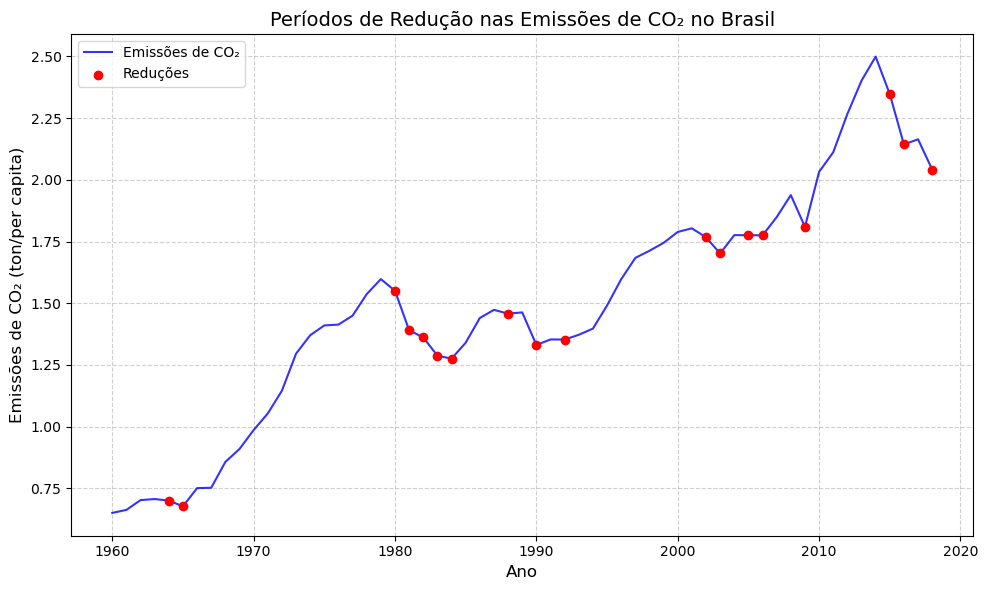

In [35]:
reductions = brazil_data.diff()  # Calcula as diferenças ano a ano
reductions_periods = reductions[reductions < 0]  # Filtra apenas reduções

# Exibindo os períodos de redução
print("\nPeríodos de redução nas emissões de CO₂ no Brasil:")
print(reductions_periods.dropna())  # Remove valores NaN para exibir somente os anos com reduções

# Visualizando as reduções
plt.figure(figsize=(10, 6))
plt.plot(years_cleaned, brazil_data, color='blue', label='Emissões de CO₂', alpha=0.8)
plt.scatter(
    years_cleaned[reductions < 0], 
    brazil_data[reductions < 0], 
    color='red', 
    label='Reduções', 
    zorder=5
)

# Configurações do gráfico
plt.title("Períodos de Redução nas Emissões de CO₂ no Brasil", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Emissões de CO₂ (ton/per capita)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

# Mostrando o gráfico
plt.show()


### Análise

Os períodos de redução nas emissões de CO₂ no Brasil, conforme apresentado, destacam momentos específicos de desaceleração ou diminuição das emissões ao longo das últimas décadas. Esses períodos, como em 1965, 1981, 1990, 2009, 2015 e 2016, refletem mudanças significativas no cenário econômico e ambiental do país. A redução mais expressiva ocorreu em 2016 (-0,203 toneladas per capita), possivelmente associada à desaceleração econômica e à crise financeira que afetou o país naquele período. Outras reduções, como em 1981 e 1990, podem estar relacionadas a políticas públicas voltadas para a conservação ambiental e à diminuição do uso de fontes de energia poluentes. No entanto, apesar dessas quedas pontuais, as emissões totais do Brasil mostram uma tendência geral de aumento nas últimas décadas, refletindo o crescente consumo de energia e a pressão sobre os recursos naturais. As reduções observadas indicam que há espaço para a implementação de políticas mais eficazes de mitigação de emissões e preservação ambiental.

## Pergunta 10: Contribuição do Continente Americano

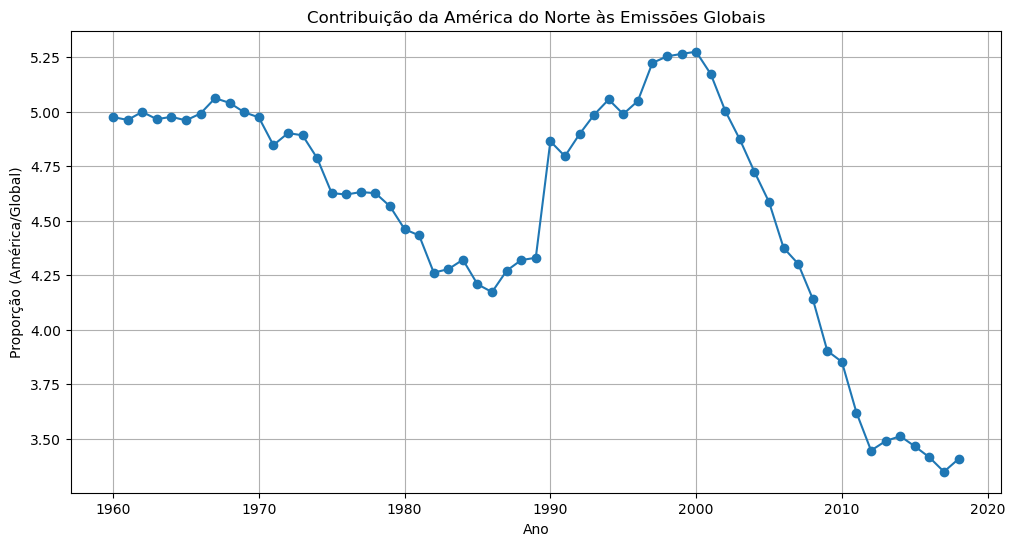

In [38]:
america_data = region_data_cleaned.loc['North America']
global_data = region_data_cleaned.loc['World']
america_contribution = america_data / global_data
plot_graph(years_cleaned, america_contribution, "Contribuição da América do Norte às Emissões Globais", "Ano", "Proporção (América/Global)")

### Análise

O gráfico revela uma tendência de redução ao longo das décadas, com duas quedas significativas. A primeira ocorreu entre o final dos anos 60 e a segunda metade dos anos 80, período marcado por crises energéticas e um aumento nas políticas ambientais, como o estabelecimento de leis de controle de poluição. A segunda redução importante aconteceu nos anos 2000 até o início dos anos 2010, impulsionada por fatores como a crise financeira global de 2008 e o aumento do uso de fontes de energia renováveis, especialmente nos Estados Unidos e Canadá. Embora essas reduções sejam notáveis, a América do Norte ainda desempenha um papel crucial nas emissões globais, refletindo os desafios contínuos para equilibrar crescimento econômico com práticas sustentáveis.

## Pergunta 11: Como as emissões de CO₂ dos países evoluíram entre 1960 e 2018 e quais são as tendências de crescimento ou redução ao longo desse período? (Classificação)

                    precision    recall  f1-score   support

    High Emissions       0.71      1.00      0.83         5
     Low Emissions       0.98      0.98      0.98        54
Moderate Emissions       0.95      0.86      0.90        21

          accuracy                           0.95        80
         macro avg       0.88      0.95      0.90        80
      weighted avg       0.96      0.95      0.95        80



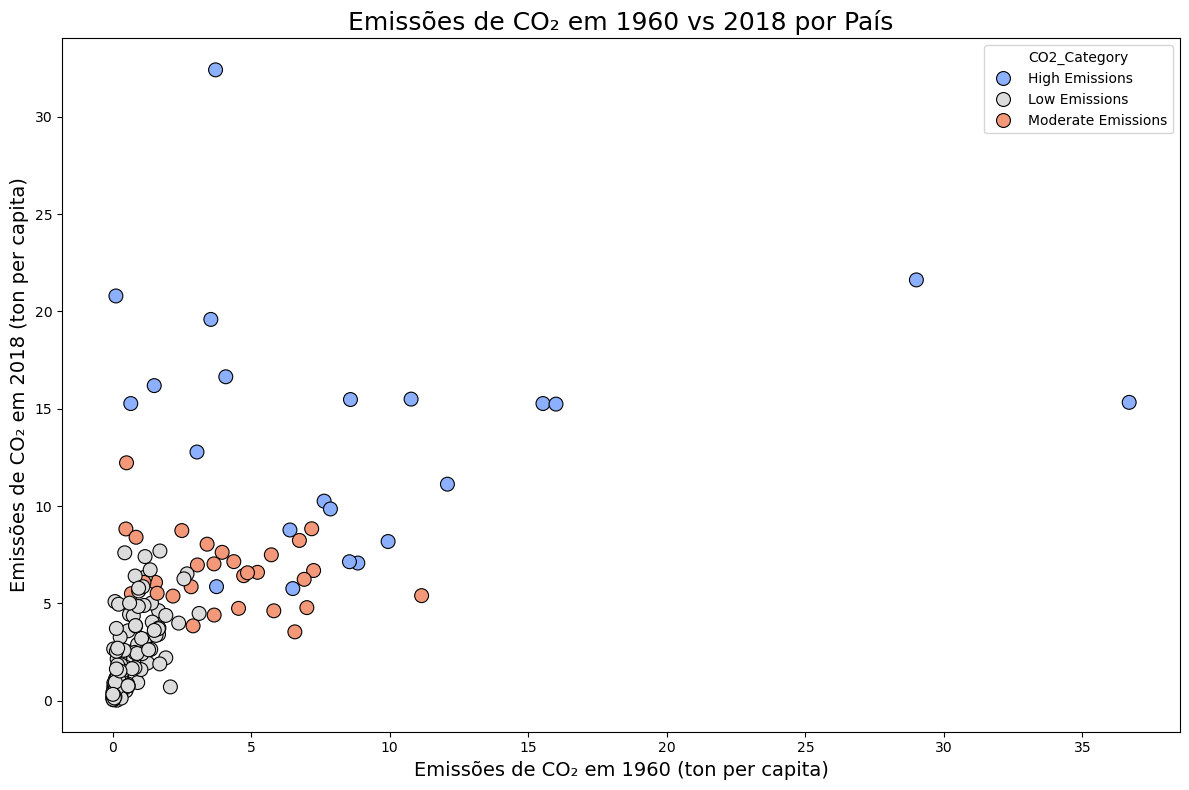

In [41]:
# Carregar os dados
data = pd.read_csv('CO2_Emissions_1960-2018.csv')

# Remover a coluna 'Country Name' para trabalhar com os dados numéricos
data_cleaned = data.drop('Country Name', axis=1)

# Calcular as emissões médias de CO2 para cada país ao longo dos anos
data_cleaned['Average_Emissions'] = data_cleaned.mean(axis=1)

# Definir as categorias de emissão com base nas emissões médias
def categorize_emissions(value):
    if value >= 10:
        return 'High Emissions'
    elif value >= 5:
        return 'Moderate Emissions'
    else:
        return 'Low Emissions'

data_cleaned['CO2_Category'] = data_cleaned['Average_Emissions'].apply(categorize_emissions)

# Definir as features (dados de emissões por ano) e o rótulo (categoria)
X = data_cleaned.drop(['Average_Emissions', 'CO2_Category'], axis=1)
y = data_cleaned['CO2_Category']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo de classificação (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

# Gráfico de dispersão com as emissões de CO2 em 1960 e 2018
plt.figure(figsize=(12, 8))
sns.scatterplot(x='1960', y='2018', data=data_cleaned, hue='CO2_Category', palette='coolwarm', s=100, edgecolor='black')

# Adicionando título e rótulos
plt.title('Emissões de CO₂ em 1960 vs 2018 por País', fontsize=18)
plt.xlabel('Emissões de CO₂ em 1960 (ton per capita)', fontsize=14)
plt.ylabel('Emissões de CO₂ em 2018 (ton per capita)', fontsize=14)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Análise


O gráfico revela tendências distintas nos países: enquanto economias em crescimento, como algumas do Oriente Médio e países emergentes, mostraram aumento nas emissões, nações desenvolvidas, especialmente da Europa e América do Norte, apresentaram uma diminuição nas emissões ao longo das décadas, principalmente após 2000. A análise evidencia uma grande disparidade entre países com emissões elevadas, como os Estados Unidos, e nações com emissões mais baixas, como as africanas. Essa visualização destaca como as políticas ambientais, o crescimento industrial e a transição para energias mais limpas impactam as emissões, apontando áreas-chave para futuras intervenções globais e estratégias de sustentabilidade.

# Conclusão

Em geral, os dados de emissões de CO₂ mostram uma tendência crescente em países em desenvolvimento, como o Brasil, enquanto nações mais industrializadas, como a América do Norte, têm experimentado uma redução gradual ao longo das últimas décadas. O Brasil, embora com um aumento projetado para 2030, ainda mantém níveis relativamente baixos de emissões per capita, o que reflete seu perfil de desenvolvimento e a predominância de fontes de energia renováveis, mas também destaca o desafio de equilibrar o crescimento econômico com a sustentabilidade ambiental. Já a América do Norte, apesar de ser uma das maiores responsáveis por emissões históricas, tem apresentado quedas significativas, impulsionadas por crises econômicas e políticas ambientais mais rigorosas, embora sua contribuição global ainda seja considerável.

Esses resultados indicam que, apesar dos avanços em várias regiões, os esforços para reduzir as emissões de CO₂ ainda são insuficientes frente ao crescimento global. A redução das emissões em algumas áreas reflete o impacto de políticas ambientais, mudanças econômicas e inovações tecnológicas, mas os desafios permanecem, especialmente para países com alto consumo energético. O caminho para a mitigação das mudanças climáticas dependerá de uma transição energética global, onde países em todas as etapas de desenvolvimento adotem práticas mais sustentáveis e busquem soluções inovadoras para reduzir as emissões de forma eficaz.